# Final Capstone Project

This notebbok will be mainly devoted to the final Coursera capstone project

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Retrieve data for the neighbourhoods in Zürich

1. Read the data from the 'Stadt Zürich' webpage using the pandas read_excel function
2. Save the data in a pandas dataframe with neighbourhood and population data for 2020
3. Rename the columns 
4. Filter out the rows which contain entire 'Kreis' information and retain only the 34 single neighbourhoods
5. Print out the table and its shape

In [59]:
url = 'https://www.stadt-zuerich.ch/content/dam/stzh/prd/Deutsch/Statistik/Themen/Bevoelkerung/BEV321T3211_Auslaenderanteil_Bevoelkerung_nach-Herkunft-Stadtkreis-Stadtquartier.xlsx'
xls_data = pd.ExcelFile(url)
df1 = pd.read_excel(xls_data, '2020', skiprows = 8)
df1.columns = ["Neighbourhood",
               "Total",
               'Swiss',
               'Foreigner',
               'Foreigner Percentage']
df1 = df1[~df1.Neighbourhood.str.contains("Kreis", na=False)]
df1 = df1[~df1.Neighbourhood.str.contains("Ganze", na=False)].reset_index(drop = True)
df1

,Neighbourhood,Total,Swiss,Foreigner,Foreigner Percentage
0,Rathaus,3317,2296,1021,30.8
1,Hochschulen,675,464,211,31.3
2,Lindenhof,1010,715,295,29.2
3,City,829,567,262,31.6
4,Wollishofen,19757,13816,5941,30.1
5,Leimbach,6140,4113,2027,33.0
6,Enge,9655,6104,3551,36.8
7,Alt-Wiedikon,17764,11707,6057,34.1
8,Friesenberg,11071,9040,2031,18.3
9,Sihlfeld,21921,15118,6803,31.0


In [60]:
df1.shape

(34, 5)

# Longitude and Latitude coordinates

1. Use the geopy library to assign coordinates to each of the Zürich neighbourhoods
2. Loop over the different neighbourhoods and find the coordinates
3. Add the columns 'Latitude' and 'Longitude' to the data frame and visualize it 

In [61]:
import geopy
from geopy.geocoders import Nominatim

In [62]:
lat = []
long = []

for neigh in df1.Neighbourhood:
    address = neigh + ' Bezirk Zürich'
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    #print(location.address)
    #print((location.latitude, location.longitude))
    lat.append(location.latitude)
    long.append(location.longitude)

df1['Latitude'] = lat
df1['Longitude'] = long

In [63]:
df1

,Neighbourhood,Total,Swiss,Foreigner,Foreigner Percentage,Latitude,Longitude
0,Rathaus,3317,2296,1021,30.8,47.372649,8.544311
1,Hochschulen,675,464,211,31.3,47.373846,8.548613
2,Lindenhof,1010,715,295,29.2,47.372996,8.540799
3,City,829,567,262,31.6,47.372943,8.535346
4,Wollishofen,19757,13816,5941,30.1,47.342427,8.530708
5,Leimbach,6140,4113,2027,33.0,47.330511,8.512539
6,Enge,9655,6104,3551,36.8,47.361789,8.528708
7,Alt-Wiedikon,17764,11707,6057,34.1,47.365562,8.517851
8,Friesenberg,11071,9040,2031,18.3,47.354922,8.500523
9,Sihlfeld,21921,15118,6803,31.0,47.373218,8.510820


# Clustering

1. Select all 34 Zürich boroughs
2. Visualize Zürich's map using folium
3. Identify venues associated to each neighbourhood
4. Analyze each neighbourhood
5. Clustering
6. Examine clusters

## 1. Select boroughs

In [64]:
import folium
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [65]:
zurich_neighborhoods = df1
zurich_neighborhoods.head()

,Neighbourhood,Total,Swiss,Foreigner,Foreigner Percentage,Latitude,Longitude
0,Rathaus,3317,2296,1021,30.8,47.372649,8.544311
1,Hochschulen,675,464,211,31.3,47.373846,8.548613
2,Lindenhof,1010,715,295,29.2,47.372996,8.540799
3,City,829,567,262,31.6,47.372943,8.535346
4,Wollishofen,19757,13816,5941,30.1,47.342427,8.530708


## 2. Visualize Zürich map

In [66]:
#Find Zürich coordinates
address = 'Zürich, Switzerland'

geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Zürich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Zürich are 47.3744489, 8.5410422.


In [67]:
#Create map of Zürich and its neighbourhoods using latitude and longitude values
map_zurich = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(zurich_neighborhoods['Latitude'], zurich_neighborhoods['Longitude'], zurich_neighborhoods['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zurich)  
    
map_zurich

## 3. Identify venues

In [68]:
#Variables to get Zurich venues
CLIENT_ID = 'FUD3UCOJBKTSIZHTKCLFA55JVWQFMOVENUFLNMURETLLETHD' # your Foursquare ID
CLIENT_SECRET = 'BAIDEQGV3WJ01EYA4IXSJ3C12LXV51EKZCUEVZHW5R1OQYOK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FUD3UCOJBKTSIZHTKCLFA55JVWQFMOVENUFLNMURETLLETHD
CLIENT_SECRET:BAIDEQGV3WJ01EYA4IXSJ3C12LXV51EKZCUEVZHW5R1OQYOK


In [69]:
#Same function used during the course
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [70]:
#list Zürich's venues
zurich_venues = getNearbyVenues(names=zurich_neighborhoods['Neighbourhood'],
                                   latitudes=zurich_neighborhoods['Latitude'],
                                   longitudes=zurich_neighborhoods['Longitude']
                                  )

Rathaus
Hochschulen
Lindenhof
City
Wollishofen
Leimbach
Enge
Alt-Wiedikon
Friesenberg
Sihlfeld
Werd
Langstrasse
Hard
Gewerbeschule
Escher Wyss
Unterstrass
Oberstrass
Fluntern
Hottingen
Hirslanden
Witikon
Seefeld
Mühlebach
Weinegg
Albisrieden
Altstetten
Höngg
Wipkingen
Affoltern
Oerlikon
Seebach
Saatlen
Schwamendingen-Mitte
Hirzenbach


In [71]:
print(zurich_venues.shape)
zurich_venues.head()

(1065, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rathaus,47.372649,8.544311,Fitnesspark Münstergasse,47.370888,8.544999,Gym / Fitness Center
1,Rathaus,47.372649,8.544311,Café Schober,47.371400,8.544149,Café
2,Rathaus,47.372649,8.544311,Schwarzenbach Kolonialwaren,47.371444,8.544091,Gourmet Shop
3,Rathaus,47.372649,8.544311,Neumarkt 17 AG,47.372868,8.546121,Furniture / Home Store
4,Rathaus,47.372649,8.544311,Louis Take Away,47.373037,8.543776,Diner


In [111]:
#Count how many venues for each neighbourhood
zurich_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Affoltern,13,13,13,13,13,13
Albisrieden,8,8,8,8,8,8
Alt-Wiedikon,21,21,21,21,21,21
Altstetten,27,27,27,27,27,27
City,63,63,63,63,63,63
Enge,38,38,38,38,38,38
Escher Wyss,72,72,72,72,72,72
Fluntern,13,13,13,13,13,13
Friesenberg,2,2,2,2,2,2


In [73]:
print('There are {} unique categories.'.format(len(zurich_venues['Venue Category'].unique())))

There are 175 unique categories.


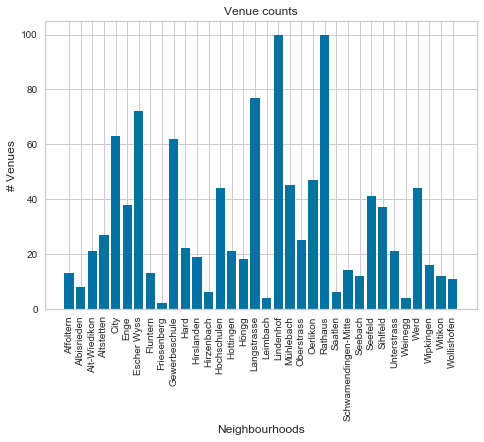

In [128]:
zurich_counts = zurich_venues.groupby('Neighborhood').count()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(zurich_counts.index,zurich_counts.Venue)
plt.xticks(zurich_counts.index, rotation=90)
# Add title and axis names
plt.title('Venue counts')
plt.xlabel('Neighbourhoods', fontsize='large')
plt.ylabel('# Venues', fontsize='large')
# Show 
plt.show()

## 4. Analyze each neighbourhood

In [74]:
#Follows similar logic as explained during the course

# one hot encoding
zurich_onehot = pd.get_dummies(zurich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
zurich_onehot['Neighborhood'] = zurich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [zurich_onehot.columns[-1]] + list(zurich_onehot.columns[:-1])
zurich_onehot = zurich_onehot[fixed_columns]

zurich_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,...,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Water Park,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Rathaus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rathaus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rathaus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rathaus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rathaus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
zurich_onehot.shape

(1065, 176)

In [76]:
#Group by neighbourhood and calculate the mean of each category to prepare for clustering 
zurich_grouped = zurich_onehot.groupby('Neighborhood').mean().reset_index()
zurich_grouped

,Neighborhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,...,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Water Park,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Affoltern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,Albisrieden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,Alt-Wiedikon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,...,0.000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,Altstetten,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,City,0.000000,0.000000,0.015873,0.000000,0.015873,0.015873,0.000000,0.000000,0.000000,...,0.000,0.000000,0.047619,0.000000,0.015873,0.000000,0.000000,0.015873,0.00,0.000000
5,Enge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,Escher Wyss,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.013889,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
7,Fluntern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
8,Friesenberg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Gewerbeschule,0.016129,0.000000,0.000000,0.016129,0.000000,0.000000,0.048387,0.000000,0.000000,...,0.000,0.016129,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.00,0.016129


In [77]:
zurich_grouped.shape

(34, 176)

In [78]:
#Function from the course
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [79]:
#Identify most common venues for each neighbourhood - as done in the course

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = zurich_grouped['Neighborhood']

for ind in np.arange(zurich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(zurich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Affoltern,Bus Station,Supermarket,Athletics & Sports,Light Rail Station,Train Station,Gym / Fitness Center,Diner,Grocery Store,Italian Restaurant,Department Store
1,Albisrieden,Pizza Place,Trattoria/Osteria,Supermarket,Swiss Restaurant,Scenic Lookout,Bus Station,Grocery Store,Bakery,Diner,Dessert Shop
2,Alt-Wiedikon,Restaurant,Italian Restaurant,Playground,Bakery,Lounge,Farmers Market,Burrito Place,Light Rail Station,Supermarket,Beer Garden
3,Altstetten,Supermarket,Mediterranean Restaurant,Bus Station,Bakery,Plaza,Doner Restaurant,Mexican Restaurant,Café,Food,Burger Joint
4,City,Bar,Italian Restaurant,Department Store,Restaurant,Vegetarian / Vegan Restaurant,Plaza,Swiss Restaurant,Cocktail Bar,Café,Hotel


## 5. Clustering

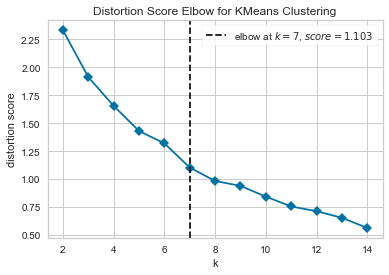

In [80]:
#Find optimal number of clusters using the elbow method
zurich_grouped_clustering = zurich_grouped.drop('Neighborhood', 1)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings=False)

visualizer.fit(zurich_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [81]:
# set number of clusters
kclusters = 7

zurich_grouped_clustering = zurich_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(zurich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 6, 1, 1, 1, 1, 1, 6, 2, 1], dtype=int32)

In [82]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [83]:
zurich_merged = zurich_neighborhoods.rename(columns={"Neighbourhood": "Neighborhood"})

# merge with zurich_neighborhoods to add latitude/longitude for each neighborhood
zurich_merged = zurich_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

zurich_merged.head() # check the last columns!

,Neighborhood,Total,Swiss,Foreigner,Foreigner Percentage,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rathaus,3317,2296,1021,30.8,47.372649,8.544311,1,Swiss Restaurant,Café,Boutique,Bar,Restaurant,Plaza,French Restaurant,Italian Restaurant,Hotel,Cocktail Bar
1,Hochschulen,675,464,211,31.3,47.373846,8.548613,1,Café,Hotel,Swiss Restaurant,Bar,Science Museum,Restaurant,Plaza,Tram Station,Cupcake Shop,Shoe Store
2,Lindenhof,1010,715,295,29.2,47.372996,8.540799,1,Swiss Restaurant,Café,Department Store,Hotel,Bar,French Restaurant,Plaza,Cocktail Bar,Lounge,Restaurant
3,City,829,567,262,31.6,47.372943,8.535346,1,Bar,Italian Restaurant,Department Store,Restaurant,Vegetarian / Vegan Restaurant,Plaza,Swiss Restaurant,Cocktail Bar,Café,Hotel
4,Wollishofen,19757,13816,5941,30.1,47.342427,8.530708,0,Supermarket,Plaza,Restaurant,Swiss Restaurant,Cheese Shop,Salon / Barbershop,Bus Station,Tram Station,Music Venue,Irish Pub


In [84]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zurich_merged['Latitude'], zurich_merged['Longitude'], zurich_merged['Neighborhood'], zurich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 6. Examine clusters

In [85]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 0, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,19757,47.342427,8.530708,0,Supermarket,Plaza,Restaurant,Swiss Restaurant,Cheese Shop,Salon / Barbershop,Bus Station,Tram Station,Music Venue,Irish Pub
31,8799,47.410987,8.563383,0,Kebab Restaurant,Supermarket,Arts & Crafts Store,Camera Store,Tram Station,Bagel Shop,Ethiopian Restaurant,Flower Shop,Flea Market,Fast Food Restaurant
32,11083,47.404437,8.568326,0,Plaza,Restaurant,Café,Shopping Mall,Light Rail Station,Camera Store,Supermarket,Swiss Restaurant,Thai Restaurant,Fast Food Restaurant


In [86]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 1, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3317,47.372649,8.544311,1,Swiss Restaurant,Café,Boutique,Bar,Restaurant,Plaza,French Restaurant,Italian Restaurant,Hotel,Cocktail Bar
1,675,47.373846,8.548613,1,Café,Hotel,Swiss Restaurant,Bar,Science Museum,Restaurant,Plaza,Tram Station,Cupcake Shop,Shoe Store
2,1010,47.372996,8.540799,1,Swiss Restaurant,Café,Department Store,Hotel,Bar,French Restaurant,Plaza,Cocktail Bar,Lounge,Restaurant
3,829,47.372943,8.535346,1,Bar,Italian Restaurant,Department Store,Restaurant,Vegetarian / Vegan Restaurant,Plaza,Swiss Restaurant,Cocktail Bar,Café,Hotel
6,9655,47.361789,8.528708,1,Bar,Hotel,Italian Restaurant,Tram Station,Plaza,Supermarket,Swiss Restaurant,History Museum,Pizza Place,Middle Eastern Restaurant
7,17764,47.365562,8.517851,1,Restaurant,Italian Restaurant,Playground,Bakery,Lounge,Farmers Market,Burrito Place,Light Rail Station,Supermarket,Beer Garden
9,21921,47.373218,8.510820,1,Café,Italian Restaurant,Bar,Plaza,Supermarket,Hotel,Tapas Restaurant,Park,Creperie,Coffee Shop
10,4570,47.371991,8.526782,1,Bar,Swiss Restaurant,Restaurant,Sushi Restaurant,Italian Restaurant,Coffee Shop,Thai Restaurant,Bakery,Café,French Restaurant
11,11910,47.375903,8.525326,1,Swiss Restaurant,Bar,Italian Restaurant,Café,Restaurant,Chinese Restaurant,Thai Restaurant,Nightclub,Middle Eastern Restaurant,Movie Theater
12,12554,47.381743,8.512554,1,Hotel,Plaza,Café,Mediterranean Restaurant,Swiss Restaurant,Bar,Park,Outdoors & Recreation,Restaurant,Bus Station


In [87]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 2, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,11071,47.354922,8.500523,2,Stables,Tennis Court,Electronics Store,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space


In [88]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 3, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,12963,47.402204,8.587687,3,Tram Station,Steakhouse,Furniture / Home Store,Electronics Store,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory


In [89]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 4, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,6140,47.330511,8.512539,4,Trail,Restaurant,Gas Station,Grocery Store,Doner Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space


In [90]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 5, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,5562,47.351058,8.56991,5,Modern European Restaurant,Swiss Restaurant,Restaurant,Tennis Court,Yoga Studio,Electronics Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory


In [91]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 6, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,10824,47.385706,8.549124,6,Tram Station,Hotel,Bus Station,Bakery,Supermarket,Italian Restaurant,Swiss Restaurant,Asian Restaurant,Medical Supply Store,Hill
17,8685,47.376777,8.558775,6,Tram Station,Bakery,Grocery Store,Café,Supermarket,Gastropub,Pizza Place,Bus Station,Plaza,Dessert Shop
18,11304,47.369680,8.555082,6,Hotel,Swiss Restaurant,Italian Restaurant,Tram Station,Plaza,Grocery Store,Bistro,Supermarket,Korean Restaurant,Bakery
19,7396,47.362948,8.564269,6,Tram Station,Italian Restaurant,Plaza,Bus Station,Grocery Store,Korean Restaurant,Casino,Steakhouse,Swiss Restaurant,Mediterranean Restaurant
20,11244,47.358310,8.590628,6,Discount Store,Bus Station,Bakery,Department Store,Indian Restaurant,Supermarket,Church,Tram Station,Grocery Store,Shoe Store
24,22364,47.374857,8.484657,6,Pizza Place,Trattoria/Osteria,Supermarket,Swiss Restaurant,Scenic Lookout,Bus Station,Grocery Store,Bakery,Diner,Dessert Shop
26,24439,47.401660,8.497715,6,Cosmetics Shop,Grocery Store,Tram Station,Discount Store,Fast Food Restaurant,Bus Station,Mexican Restaurant,Steakhouse,Supermarket,Gas Station
28,26584,47.418762,8.507186,6,Bus Station,Supermarket,Athletics & Sports,Light Rail Station,Train Station,Gym / Fitness Center,Diner,Grocery Store,Italian Restaurant,Department Store


In [93]:
zurich_merged

,Neighborhood,Total,Swiss,Foreigner,Foreigner Percentage,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rathaus,3317,2296,1021,30.8,47.372649,8.544311,1,Swiss Restaurant,Café,Boutique,Bar,Restaurant,Plaza,French Restaurant,Italian Restaurant,Hotel,Cocktail Bar
1,Hochschulen,675,464,211,31.3,47.373846,8.548613,1,Café,Hotel,Swiss Restaurant,Bar,Science Museum,Restaurant,Plaza,Tram Station,Cupcake Shop,Shoe Store
2,Lindenhof,1010,715,295,29.2,47.372996,8.540799,1,Swiss Restaurant,Café,Department Store,Hotel,Bar,French Restaurant,Plaza,Cocktail Bar,Lounge,Restaurant
3,City,829,567,262,31.6,47.372943,8.535346,1,Bar,Italian Restaurant,Department Store,Restaurant,Vegetarian / Vegan Restaurant,Plaza,Swiss Restaurant,Cocktail Bar,Café,Hotel
4,Wollishofen,19757,13816,5941,30.1,47.342427,8.530708,0,Supermarket,Plaza,Restaurant,Swiss Restaurant,Cheese Shop,Salon / Barbershop,Bus Station,Tram Station,Music Venue,Irish Pub
5,Leimbach,6140,4113,2027,33.0,47.330511,8.512539,4,Trail,Restaurant,Gas Station,Grocery Store,Doner Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space
6,Enge,9655,6104,3551,36.8,47.361789,8.528708,1,Bar,Hotel,Italian Restaurant,Tram Station,Plaza,Supermarket,Swiss Restaurant,History Museum,Pizza Place,Middle Eastern Restaurant
7,Alt-Wiedikon,17764,11707,6057,34.1,47.365562,8.517851,1,Restaurant,Italian Restaurant,Playground,Bakery,Lounge,Farmers Market,Burrito Place,Light Rail Station,Supermarket,Beer Garden
8,Friesenberg,11071,9040,2031,18.3,47.354922,8.500523,2,Stables,Tennis Court,Electronics Store,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space
9,Sihlfeld,21921,15118,6803,31.0,47.373218,8.510820,1,Café,Italian Restaurant,Bar,Plaza,Supermarket,Hotel,Tapas Restaurant,Park,Creperie,Coffee Shop


In [110]:
df2 = zurich_merged[~zurich_merged['1st Most Common Venue'].str.contains("Swiss", na=False) & 
                    ~zurich_merged['2nd Most Common Venue'].str.contains("Swiss", na=False) & 
                    ~zurich_merged['3rd Most Common Venue'].str.contains("Swiss", na=False) & 
                    ~zurich_merged['4th Most Common Venue'].str.contains("Swiss", na=False) & 
                    ~zurich_merged['5th Most Common Venue'].str.contains("Swiss", na=False) & 
                    ~zurich_merged['6th Most Common Venue'].str.contains("Swiss", na=False) & 
                    ~zurich_merged['7th Most Common Venue'].str.contains("Swiss", na=False) & 
                    ~zurich_merged['8th Most Common Venue'].str.contains("Swiss", na=False) & 
                    ~zurich_merged['9th Most Common Venue'].str.contains("Swiss", na=False) & 
                    ~zurich_merged['10th Most Common Venue'].str.contains("Swiss", na=False)]
df2[df2['Cluster Labels'] == 1].sort_values(by=['Foreigner Percentage'])

,Neighborhood,Total,Swiss,Foreigner,Foreigner Percentage,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Wipkingen,16605,12127,4478,27.0,47.393495,8.528602,1,Grocery Store,Italian Restaurant,Train Station,Supermarket,Restaurant,Breakfast Spot,Bar,Bakery,Chinese Restaurant,Japanese Restaurant
15,Unterstrass,24493,17683,6810,27.8,47.391447,8.539572,1,Bakery,Middle Eastern Restaurant,Café,Italian Restaurant,Hotel,Pizza Place,Falafel Restaurant,Food & Drink Shop,Sporting Goods Shop,Supermarket
9,Sihlfeld,21921,15118,6803,31.0,47.373218,8.510820,1,Café,Italian Restaurant,Bar,Plaza,Supermarket,Hotel,Tapas Restaurant,Park,Creperie,Coffee Shop
14,Escher Wyss,6198,4187,2011,32.4,47.390899,8.515360,1,Café,Hotel,Bar,Restaurant,Gym / Fitness Center,Italian Restaurant,Park,Hotel Bar,Bakery,Tram Station
7,Alt-Wiedikon,17764,11707,6057,34.1,47.365562,8.517851,1,Restaurant,Italian Restaurant,Playground,Bakery,Lounge,Farmers Market,Burrito Place,Light Rail Station,Supermarket,Beer Garden
22,Mühlebach,6414,4158,2256,35.2,47.360772,8.554362,1,Italian Restaurant,Café,Supermarket,Hotel,Salad Place,Asian Restaurant,Japanese Restaurant,Bar,Bakery,Plaza
25,Altstetten,34098,21830,12268,36.0,47.387403,8.486061,1,Supermarket,Mediterranean Restaurant,Bus Station,Bakery,Plaza,Doner Restaurant,Mexican Restaurant,Café,Food,Burger Joint
29,Oerlikon,23548,14557,8991,38.2,47.410421,8.544585,1,Supermarket,Italian Restaurant,Tram Station,Hotel,Indian Restaurant,Kebab Restaurant,Restaurant,Pub,Indonesian Restaurant,Coffee Shop
30,Seebach,26056,15869,10187,39.1,47.420438,8.548377,1,Hookah Bar,Tram Station,Korean Restaurant,Laser Tag,Eastern European Restaurant,Pharmacy,Pizza Place,Pool,Supermarket,Bakery
